In [1]:
import numpy as np
from scipy.special import hermite

from matplotlib import pyplot as plt
import ipywidgets as widgets

from quasiprobability import wigner_quasiprobability as W

%matplotlib widget

Simple harmonic oscillator with $\hbar = \omega = 1$

In [2]:
def H(x: float, p: float) -> float:
    return (x**2 + p**2)/2

def E_n(n: int) -> float:
    return n + 1/2

def psi_n(n: int):
    return lambda x, t: np.pi**(-1/4) * hermite(n)(x) * np.exp(-x**2/2) * np.exp(-1j * E_n(n) * t)

In [3]:
def psi_A(x: float, t: float):
    return (psi_n(0)(x, t) + psi_n(1)(x, t))/np.sqrt(2)

def psi_B(x: float, t: float):
    return (3*psi_n(0)(x, t) + 4*psi_n(2)(x, t))/5

In [4]:
increments = 50
boxes = 25
dt = 2 * np.pi / increments

interactive(children=(Play(value=0, description='t', interval=125, max=50, repeat=True), Output()), _dom_class…

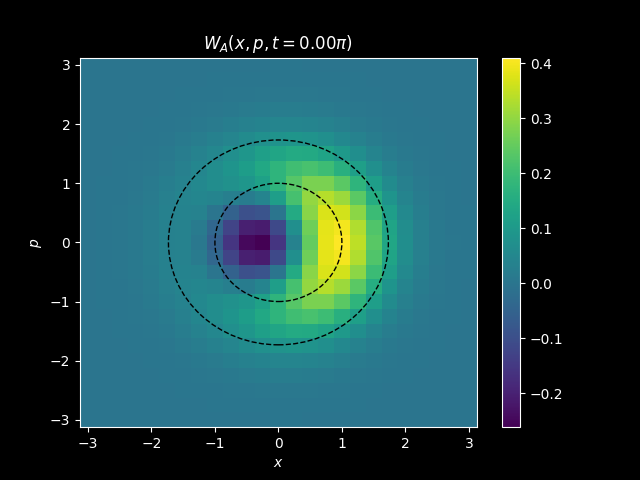

In [5]:
fig1, ax1 = plt.subplots()

ax1.set_xlabel("$x$")
ax1.set_ylabel("$p$")

X, P = np.meshgrid(np.linspace(-3, 3, boxes), np.linspace(-3, 3, boxes), sparse=True)
T1 = widgets.Play(min=0, max=increments, step=1, interval=dt * 1000, description="t", repeat=True)

W_A = {step: W(psi_A, X, P, step * dt) for step in range(increments + 1)}

cb1 = ax1.pcolormesh(X, P, W_A[0])
cbar1 = fig1.colorbar(cb1)

ax1.add_patch(plt.Circle((0, 0), (2*E_n(0))**0.5, color="black", linestyle="--", fill=False))
ax1.add_patch(plt.Circle((0, 0), (2*E_n(1))**0.5, color="black", linestyle="--", fill=False))

ax1.set_title("$W_A$ ($t = 0$)")

@widgets.interact(t=T1)
def update_A(t: int = 0) -> None:
    cb1.set_array(W_A[t])
    cb1.changed()
    ax1.set_title(f"$W_A(x, p, t={2 * t/increments:.2f} \\pi)$")

interactive(children=(Play(value=0, description='t', interval=125, max=50, repeat=True), Output()), _dom_class…

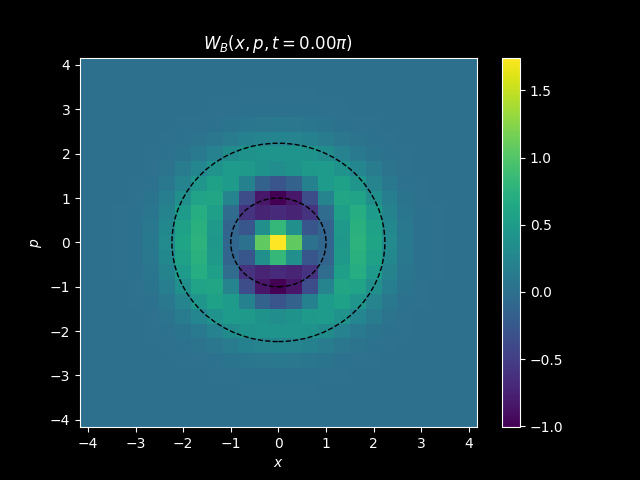

In [6]:
fig2, ax2 = plt.subplots()

ax2.set_xlabel("$x$")
ax2.set_ylabel("$p$")

X, P = np.meshgrid(np.linspace(-4, 4, boxes), np.linspace(-4, 4, boxes), sparse=True)
T2 = widgets.Play(min=0, max=increments, step=1, interval=dt * 1000, description="t", repeat=True)

W_B = {step: W(psi_B, X, P, step * dt) for step in range(increments + 1)}

cb2 = ax2.pcolormesh(X, P, W_B[0])
cbar2 = fig2.colorbar(cb2)

ax2.add_patch(plt.Circle((0, 0), (2*E_n(0))**0.5, color="black", linestyle="--", fill=False))
ax2.add_patch(plt.Circle((0, 0), (2*E_n(2))**0.5, color="black", linestyle="--", fill=False))

ax2.set_title("$W_B$ ($t = 0$)")

@widgets.interact(t=T2)
def update_B(t: float = 0) -> None:
    cb2.set_array(W_B[t])
    cb2.changed()
    ax2.set_title(f"$W_B(x, p, t = {2 * t/increments:.2f} \\pi)$")